In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd
a=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset (1).csv")
print(a)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.DataFrame(a)

# Initialize label encoders for each categorical column
label_encoders = {}

# Apply label encoding for each categorical column
for column in ['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'BMI Category','Heart Rate']:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder

# Print the updated DataFrame
print(df)

# To convert a specific category back to its original value, you can use the inverse transform like this:
# original_value = label_encoders['Tumour_Stage'].inverse_transform([encoded_value])


     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer               3   
1            2    Male   28                Doctor               4   
2            3    Male   28                Doctor               4   
3            4    Male   28  Sales Representative               1   
4            5    Male   28  Sales Representative               1   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse              22   
370        371  Female   59                 Nurse              21   
371        372  Female   59                 Nurse              22   
372        373  Female   59                 Nurse              22   
373        374  Female   59                 Nurse              22   

     Quality of Sleep  Physical Activity Level  Stress Level  BMI Category  \
0                   6                        4             3             3   
1              

In [ ]:
a1=a.dropna()
y=a1["Heart Rate"]
print(y)
x=a1.drop(['Blood Pressure','Daily Steps','Sleep Disorder','Gender','Occupation'],axis=1)

print(x)
print(x.shape)

0      10
1       8
2       8
3      17
4      17
       ..
369     2
370     2
371     2
372     2
373     2
Name: Heart Rate, Length: 374, dtype: int64
     Person ID  Age  Sleep Duration  Quality of Sleep  \
0            1   27               3                 6   
1            2   28               4                 6   
2            3   28               4                 6   
3            4   28               1                 4   
4            5   28               1                 4   
..         ...  ...             ...               ...   
369        370   59              22                 9   
370        371   59              21                 9   
371        372   59              22                 9   
372        373   59              22                 9   
373        374   59              22                 9   

     Physical Activity Level  Stress Level  BMI Category  Heart Rate  
0                          4             3             3          10  
1                  

In [ ]:
x1=x.fillna(0)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=20)
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

     Person ID  Age  Sleep Duration  Quality of Sleep  \
219        220   43               7                 6   
81          82   34               0                 4   
132        133   38              14                 8   
171        172   41              18                 8   
148        149   39              11                 7   
..         ...  ...             ...               ...   
331        332   53              25                 9   
218        219   43              19                 8   
223        224   44               6                 6   
271        272   49               3                 6   
355        356   58              21                 9   

     Physical Activity Level  Stress Level  BMI Category  Heart Rate  
219                        5             4             3           5  
81                         1             5             3          13  
132                        9             2             0           2  
171                       15   

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(x_test)
accuracy_LR = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:",accuracy_LR)
print("Classification Report:\n",report)

ValueError: ignored

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score




# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.

# Train the classifier on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy_svm1 = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy_svm1}")
print("Classification Report:\n",report)

Accuracy:0.9866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           2       0.86      0.95      0.90        19
           4       0.89      0.76      0.82        21
           5       0.75      1.00      0.86        12
           8       1.00      1.00      1.00         4
          10       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1

    accuracy                           0.85        75
   macro avg       0.55      0.57      0.56        75
weighted avg       0.85      0.85      0.85        75



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Create a synthetic imbalanced dataset for demonstration
X, y = make_classification(n_classes=2, weights=[0.1, 0.9], n_samples=1000, random_state=42)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            errors = 0  # Track the number of misclassifications in each iteration
            for i in range(X.shape[0]):
                # Calculate the predicted output
                y_pred = np.dot(X[i], self.weights) + self.bias

                # Update the weights and bias based on the error
                if y[i] * y_pred <= 0:
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]
                    errors += 1  # Increment the error count

            # If no errors were made during an iteration, the perceptron has converged
            if errors == 0:
                break

    def predict(self, X):
        # Calculate the predicted output
        y_pred = np.dot(x_train, self.weights) + self.bias
        return np.sign(y_pred)

if __name__ == "__main__":
    # Sample data (replace with your own dataset)
    X = np.array(x_train)
    y = np.array(y_train)

    # Create a Perceptron instance and fit the model
    perceptron = Perceptron(learning_rate=0.1, n_iterations=1000)
    perceptron.fit(X, y)

    # Make predictions

    Predictions = perceptron.predict(x_test)
    print("Predictions:",Predictions)
    print("Classification Report:\n",report)
    #print(f"Accuracy: {accuracy*100:.2f}%")



Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Classification Report:
               precision    recall  f1-score   suppor

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_SVM = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy_SVM}")
print("Classification Report:\n",report)


Accuracy:0.8687150837988827
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           2       0.86      0.95      0.90        19
           4       0.89      0.76      0.82        21
           5       0.75      1.00      0.86        12
           8       1.00      1.00      1.00         4
          10       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1

    accuracy                           0.85        75
   macro avg       0.55      0.57      0.56        75
weighted avg       0.85      0.85      0.85        75



Accuracy: 0.87


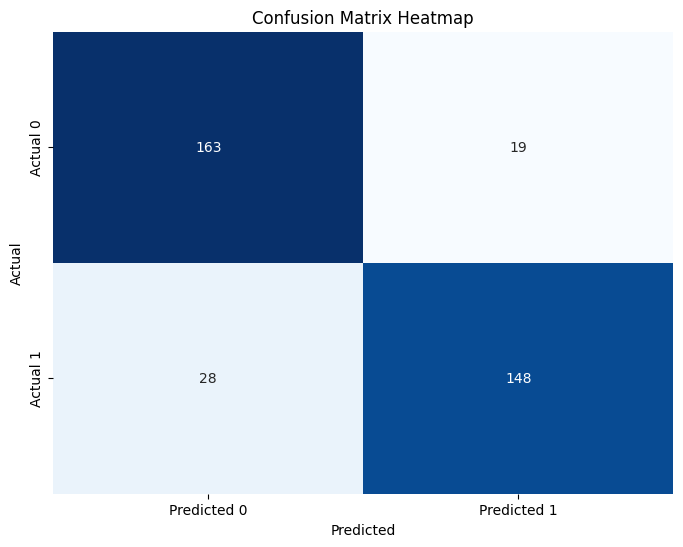

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


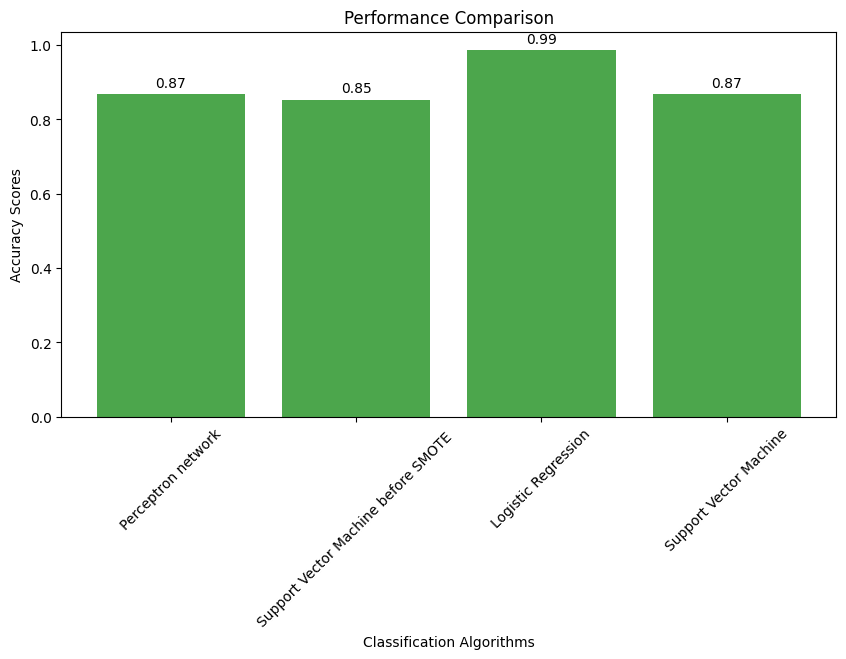

In [ ]:
import matplotlib.pyplot as plt

algorithm_names = ['Perceptron network','Support Vector Machine before SMOTE ', 'Logistic Regression', 'Support Vector Machine']
accuracy_scores = [accuracy, accuracy_LR,accuracy_svm1, accuracy_SVM]

plt.figure(figsize=(10, 5))

# Bar chart for accuracy scores
plt.bar(algorithm_names, accuracy_scores, color='Green', alpha=0.7)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Performance Comparison')

# Adding data labels
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()
